In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Customer-Churn-Records.csv')

In [ ]:
d1= df.copy()

In [ ]:
d1.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.count()


,0
RowNumber,10000
CustomerId,10000
Surname,10000
CreditScore,10000
Geography,10000
Gender,10000
Age,10000
Tenure,10000
Balance,10000
NumOfProducts,10000


In [ ]:
df.shape[0]


10000

In [ ]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 10000
Columns: 18


In [ ]:
count_dis = df["Exited"].value_counts()

In [ ]:
count_dis.index = ["Non-Churned", "Churned"]

In [ ]:
percent_distribution = (count_dis / len(df)) * 100

print("Count Distribution:\n", count_dis)
print("\nPercentage Distribution:\n", percent_distribution.round(2))

Count Distribution:
 Non-Churned    7962
Churned        2038
Name: count, dtype: int64

Percentage Distribution:
 Non-Churned    79.62
Churned        20.38
Name: count, dtype: float64


In [ ]:
salary_distribution = df.groupby("Exited")["EstimatedSalary"].describe()

print(salary_distribution)

         count           mean           std    min        25%         50%  \
Exited                                                                      
0       7962.0   99726.853141  57399.956717  90.07  50783.295   99620.355   
1       2038.0  101509.908783  57932.623392  11.58  51924.020  102489.335   

                75%        max  
Exited                          
0       148602.4450  199992.48  
1       152443.8575  199808.10  


In [ ]:
def churn_rate(group):
    return (group["Exited"].mean() * 100).round(2)

In [ ]:
churn_by_gender = df.groupby("Gender").apply(churn_rate)
print("Churn Rate by Gender:\n", churn_by_gender, "\n")

Churn Rate by Gender:
 Gender
Female    25.07
Male      16.47
dtype: float64 



/tmp/ipython-input-1526333457.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  churn_by_gender = df.groupby("Gender").apply(churn_rate)


In [ ]:
churn_by_geo = df.groupby("Geography").apply(churn_rate)
print("Churn Rate by Geography:\n", churn_by_geo, "\n")

Churn Rate by Geography:
 Geography
France     16.17
Germany    32.44
Spain      16.67
dtype: float64 



/tmp/ipython-input-3997577045.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  churn_by_geo = df.groupby("Geography").apply(churn_rate)


In [ ]:
churn_by_active = df.groupby("IsActiveMember").apply(churn_rate)
print("Churn Rate by Active/Inactive Members:\n", churn_by_active)

Churn Rate by Active/Inactive Members:
 IsActiveMember
0    26.87
1    14.27
dtype: float64


/tmp/ipython-input-1561329055.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  churn_by_active = df.groupby("IsActiveMember").apply(churn_rate)


In [ ]:
# Function to calculate churn rate
def churn_rate(group):
    return (group["Exited"].mean() * 100).round(2)

# Churn by Gender
churn_by_gender = df.groupby("Gender").apply(churn_rate)
print("Churn Rate by Gender:\n", churn_by_gender, "\n")

# Churn by Geography
churn_by_geo = df.groupby("Geography").apply(churn_rate)
print("Churn Rate by Geography:\n", churn_by_geo, "\n")

# Churn by Active/Inactive Members
churn_by_active = df.groupby("IsActiveMember").apply(churn_rate)
print("Churn Rate by Active/Inactive Members:\n", churn_by_active)

Churn Rate by Gender:
 Gender
Female    25.07
Male      16.47
dtype: float64 

Churn Rate by Geography:
 Geography
France     16.17
Germany    32.44
Spain      16.67
dtype: float64 

Churn Rate by Active/Inactive Members:
 IsActiveMember
0    26.87
1    14.27
dtype: float64


/tmp/ipython-input-4273026564.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  churn_by_gender = df.groupby("Gender").apply(churn_rate)
/tmp/ipython-input-4273026564.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  churn_by_geo = df.groupby("Geography").apply(churn_rate)
/tmp/ipython-input-4273026564.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is 

In [ ]:
avg_values = df.groupby("Exited")[["CreditScore", "Balance", "EstimatedSalary"]].mean().round(2)

In [ ]:
avg_values.index = ["Non-Churned", "Churned"]

In [ ]:
avg_values

,CreditScore,Balance,EstimatedSalary
Non-Churned,651.84,72742.75,99726.85
Churned,645.41,91109.48,101509.91


In [ ]:
Churned = df[df["Exited"] == 1] ["Age"]
Retained = df[df["Exited"] == 0] ["Age"]

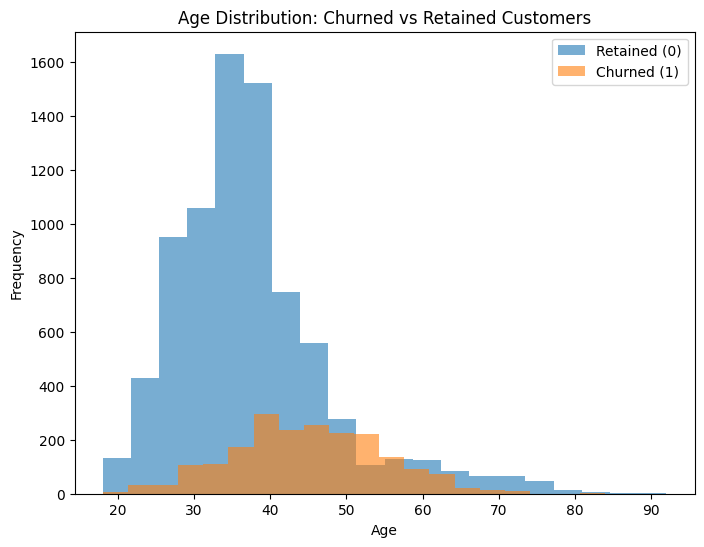

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(Retained, bins=20, alpha=0.6, label="Retained (0)")
plt.hist(Churned, bins=20, alpha=0.6, label="Churned (1)")
plt.title("Age Distribution: Churned vs Retained Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

/tmp/ipython-input-3827525609.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([Retained, Churned], labels=["Retained (0)", "Churned (1)"])


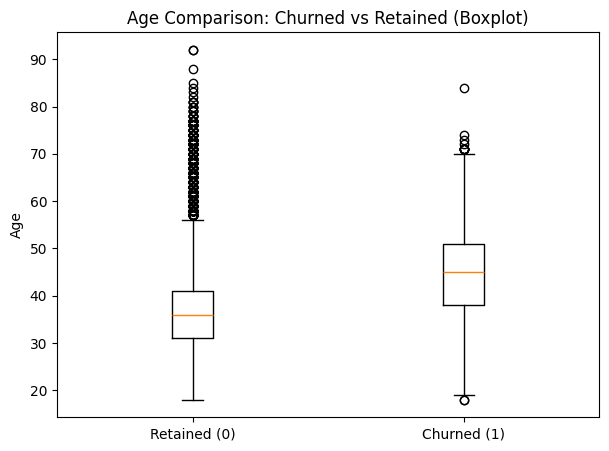

In [ ]:
plt.figure(figsize=(7, 5))
plt.boxplot([Retained, Churned], labels=["Retained (0)", "Churned (1)"])

plt.title("Age Comparison: Churned vs Retained (Boxplot)")
plt.ylabel("Age")
plt.show()

In [ ]:
numeric_df = df[['CreditScore', 'Balance', 'EstimatedSalary']]

In [ ]:
corr_matrix = numeric_df.corr()

In [ ]:
corr_matrix

,CreditScore,Balance,EstimatedSalary
CreditScore,1.000000,0.006268,-0.001384
Balance,0.006268,1.000000,0.012797
EstimatedSalary,-0.001384,0.012797,1.000000


In [ ]:
churn_by_products = df.groupby("NumOfProducts")["Exited"].mean() * 100

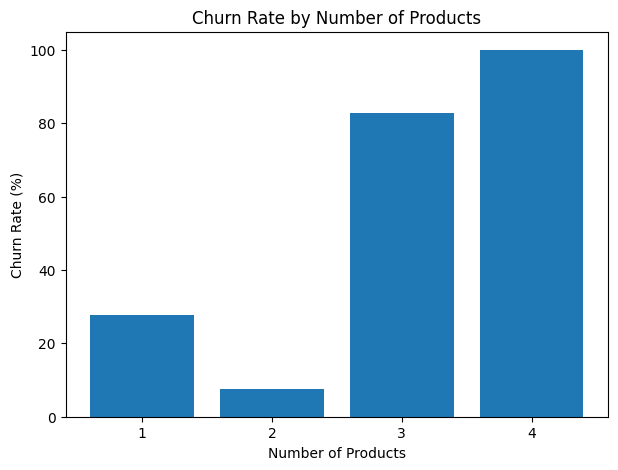

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(churn_by_products.index.astype(str), churn_by_products.values)
plt.title("Churn Rate by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Churn Rate (%)")
plt.show()


In [ ]:
num_df = df.select_dtypes(include=[np.number])

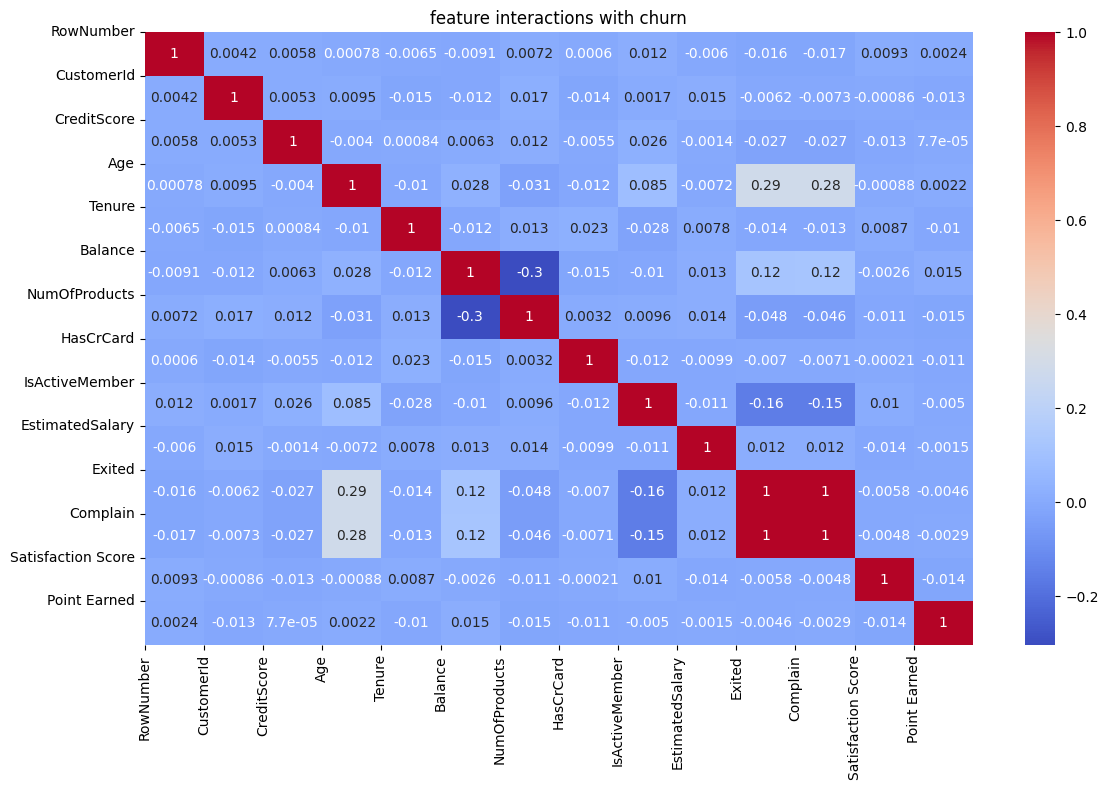

In [ ]:
corr = num_df.corr()
plt.figure(figsize=(12, 8))

plt.title("feature interactions with churn")
sns.heatmap(corr, annot=True, cmap='coolwarm')
ticks = np.arange(len(corr.columns))
plt.xticks(ticks, corr.columns, rotation=90)
plt.yticks(ticks, corr.columns)

plt.tight_layout()
plt.show()
